<h1> SMS Spam Classifier<h1>
<h2>The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.<h2>

# Load the Required Modules.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

# modelling lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb


#Metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score

# Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Exploratory Data Analysis

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df['v1'].isnull().sum()

0

In [8]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [68]:
df.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [73]:
df['v2'][6]

'Even my brother is not like to speak with me. They treat me like aids patent.'

# Data Visualization

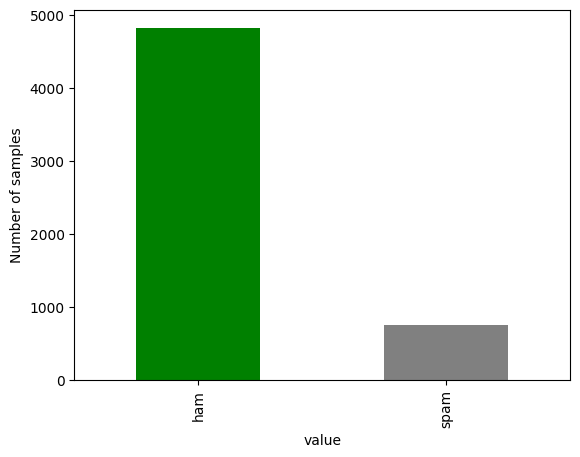

In [22]:
import matplotlib.pyplot as plt
df['v1'].value_counts().plot(kind='bar', color=['green', 'gray'])
plt.xlabel('value')
plt.ylabel('Number of samples')
plt.show()

In [9]:
df['v1'] = df['v1'].map({'ham':0 , 'spam':1})
     

# Text Preprocessing

In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.snowball.SnowballStemmer("english")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Visualize Word Cloude

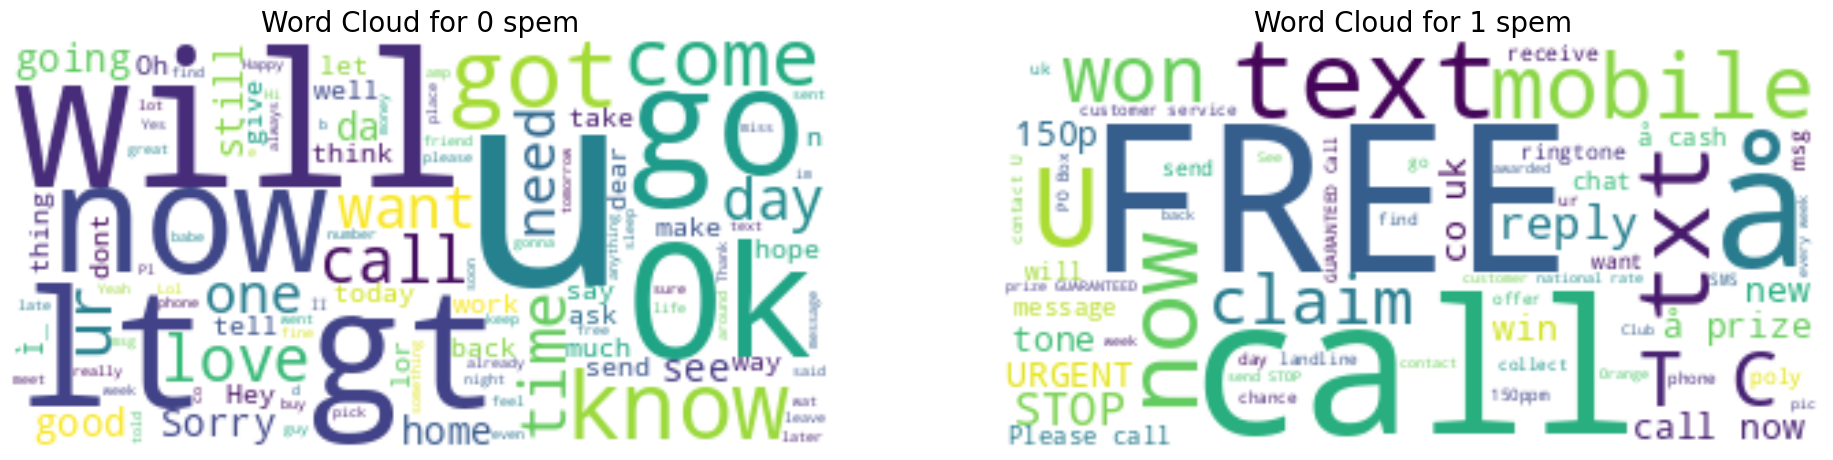

In [44]:


# Create a list of unique spam from the dataset
spem = df['v1'].unique()

# Set the figure size outside the loop
plt.figure(figsize=(20, 60))

# Iterate over each genre
for i, value in enumerate(spem, 1):
    plt.subplot(14, 2, i)  # Assuming you have 14 rows and 2 columns for 28 genres
    text_subset = " ".join(list(df[df["v1"] == value]['v2']))
    wordcloud = WordCloud(max_words=300, width=300, height=150, background_color='white').generate(text_subset)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {value} spem',fontsize=20)
    plt.axis('off')

    
plt.tight_layout()
plt.show()

In [9]:
df['v2'][5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [10]:
#change to lowercase
df['v2'] = df['v2'].str.lower()

In [11]:
#remove Urls
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

df['v2'] = df['v2'].apply(remove_url)

# Remove Punctuation

In [12]:
# Remove Punctuation
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
exclude = string.punctuation

In [14]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text
        
df['v2'] = df['v2'].apply(remove_punc)

In [15]:
df['v2'][1]

'Ok lar Joking wif u oni'

# Remove Stopwords

In [16]:
#Remove Stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [19]:
corpus = []
for i in range(0 , len(df)):
    message = re.sub('[^a-zA-Z]' , ' ' , df['v2'][i])
    message = message.lower()
    message = message.split()
    ss = SnowballStemmer(language='english')
    message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message = ' '.join(message)
    corpus.append(message)

In [20]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli'

# Feature Engineering and Modeling

# CountVectorizer

In [111]:

#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
#X = cv.fit_transform(corpus).toarray()
#y = df.iloc[: , 0].values

### Feature Extraction - TF-IDF

In [21]:

# TF-IDF feature extraction

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(corpus).toarray()
y = df.iloc[: , 0].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (3900, 6922)
Testing Data Shape:  (1672, 6922)


# Modeling

In [28]:
#  LogisticRegression
lr = LogisticRegression()
print(lr.fit(X_train , Y_train))

#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=100)
print(rf.fit(X_train , Y_train))

#SVM
svm = LinearSVC(random_state=100)
print(svm.fit(X_train , Y_train))

#Naive Bayes
nb = MultinomialNB()
print(nb.fit(X_train , Y_train))
#KNeighborsClassifier
kn=KNeighborsClassifier()
print(kn.fit(X_train , Y_train))

# Initialize the XGBoost classifier
xgb = xgb.XGBClassifier(
    n_estimators=100,  # number of trees (adjust as needed)
    max_depth=3,  # maximum depth of each tree (adjust as needed)
    learning_rate=0.1  # learning rate (adjust as needed)
)

# Train the model
xgb.fit(X_train , Y_train)






LogisticRegression()
RandomForestClassifier(random_state=100)
LinearSVC(random_state=100)
MultinomialNB()
KNeighborsClassifier()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


# campare All model Accuracy

In [30]:
from sklearn import metrics
print('Accuracy of LogisticRegression',metrics.accuracy_score(Y_test,y_pred_lr))
print('Accuracy of RandomForestClassifier',metrics.accuracy_score(Y_test,y_pred_rf))
print('Accuracy of LinearSVC',metrics.accuracy_score(Y_test,y_pred_svm))
print('Accuracy of MultinomialNB',metrics.accuracy_score(Y_test,y_pred_nb))
print('Accuracy of KNeighborsClassifier',metrics.accuracy_score(Y_test,y_pred_kn))
print('Accuracy of XGBoost classifier',metrics.accuracy_score(Y_test,y_pred_xgb))


Accuracy of LogisticRegression 0.9491626794258373
Accuracy of RandomForestClassifier 0.9754784688995215
Accuracy of LinearSVC 0.979066985645933
Accuracy of MultinomialNB 0.9593301435406698
Accuracy of KNeighborsClassifier 0.9174641148325359
Accuracy of XGBoost classifier 0.9575358851674641


In [34]:
LogisticRegression=metrics.accuracy_score(Y_test,y_pred_lr)
RandomForestClassifier=metrics.accuracy_score(Y_test,y_pred_rf)
LinearSVC=metrics.accuracy_score(Y_test,y_pred_svm)
MultinomialNB=metrics.accuracy_score(Y_test,y_pred_nb)
KNeighborsClassifier=metrics.accuracy_score(Y_test,y_pred_kn)
XGBoostclassifier=metrics.accuracy_score(Y_test,y_pred_xgb)


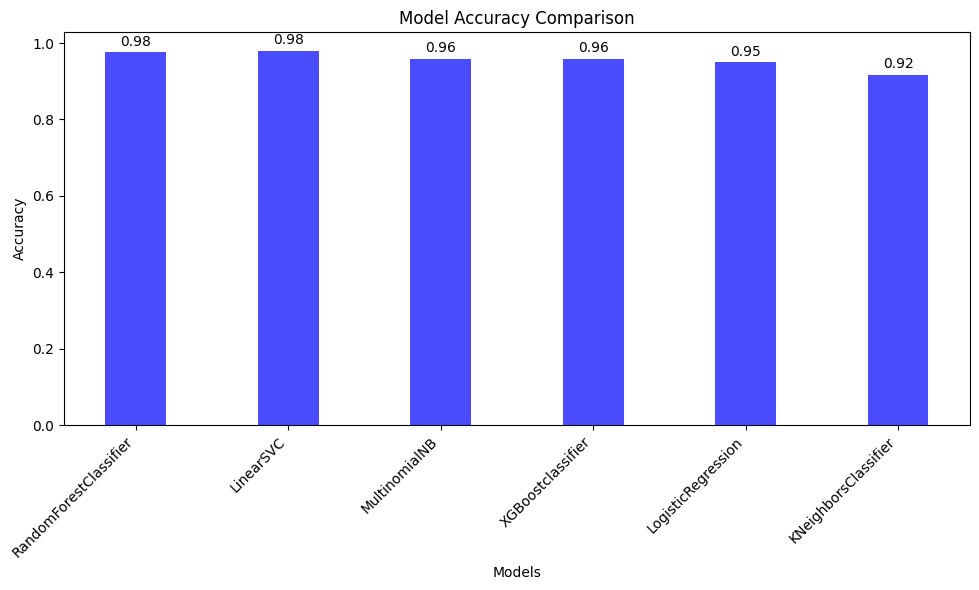

In [35]:

def plot_accuracy(models, accuracies):
    """
    Plot the accuracy of multiple models.

    Parameters:
    - models (list): A list of model names.
    - accuracies (list): A list of accuracy values corresponding to the models.
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate evenly spaced x-coordinates for each model
    x = np.arange(len(models))

    # Plot the accuracy values as bars
    ax.bar(x, accuracies, width=0.4, align='center', alpha=0.7, color='b')

    # Set the x-axis labels to be the model names
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')

    # Set axis labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Accuracy Comparison')

    # Display the accuracy values on top of the bars
    for i, acc in enumerate(accuracies):
        ax.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
models = ['RandomForestClassifier','LinearSVC','MultinomialNB','XGBoostclassifier','LogisticRegression','KNeighborsClassifier']
accuracies = [RandomForestClassifier, LinearSVC,MultinomialNB,XGBoostclassifier,LogisticRegression,KNeighborsClassifier]

plot_accuracy(models, accuracies)


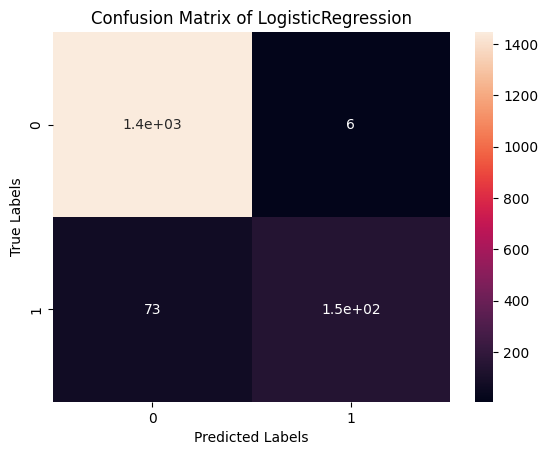

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_lr)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

In [35]:
report_lr = classification_report(Y_test, y_pred_lr)
print("Classification report of Logistic Regression (Multi-Class):\n", report_lr)

Classification report of Logistic Regression (Multi-Class):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.96      0.67      0.79       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



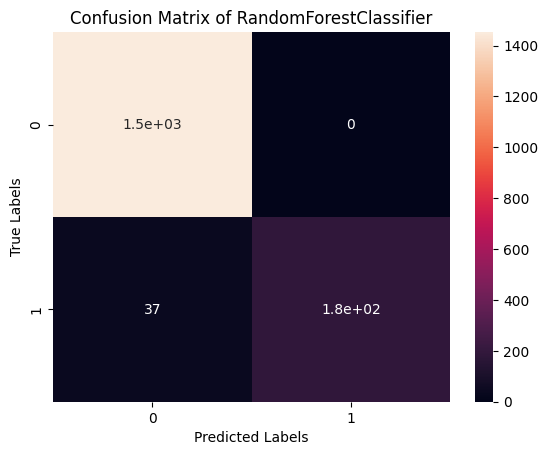

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_rf)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()

In [43]:
report_rf = classification_report(Y_test,y_pred_rf)
print("Classification report of RandomForestClassifie:\n", report_rf)

Classification report of RandomForestClassifie:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       1.00      0.83      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



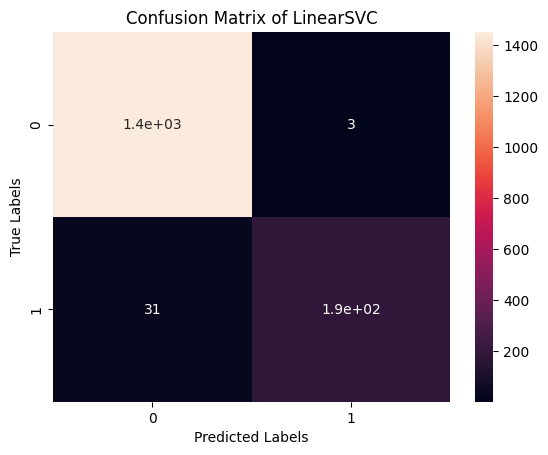

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_svm)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of LinearSVC')
plt.show()

In [45]:
report_svm = classification_report(Y_test,y_pred_svm)
print("Classification report of LinearSVC:\n", report_svm)

Classification report of LinearSVC:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.86      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



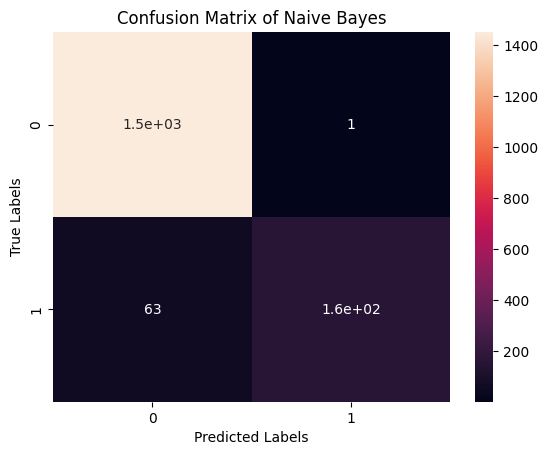

In [46]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test ,y_pred_nb)
sns.heatmap(cm , annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

In [47]:
report_nb= classification_report(Y_test,y_pred_nb)
print("Classification report of Naive Bayes:\n", report_nb)

Classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       0.99      0.71      0.83       219

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.90      1672
weighted avg       0.96      0.96      0.96      1672



# Make Predictions on New Input (Random Forest Classifier)

In [26]:
input_your_mail = "Even my brother is not like to speak with me. They treat me like aids paten"
input_data_features = vectorizer.transform([input_your_mail])
prediction = rf.predict(input_data_features)
if prediction[0] == 0:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [28]:
import os
# Change the working directory to a new path
new_directory = "/kaggle/working/"
os.chdir(new_directory)

In [29]:
import pickle

In [30]:
pickle.dump(rf , open('model.pkl' , 'wb'))

In [31]:
pickle.dump(vectorizer , open('vector.pkl' , 'wb'))